In [1]:
import pandas as pd

df = pd.read_csv("covid_19_india.csv")

# Display the first few rows of the dataset
df.head()


,Sno,Date,Time,State,Cured,Deaths,Confirmed
0,1,30/01/2020,6:00 PM,Kerala,0,0,1
1,2,31/01/2020,6:00 PM,Kerala,0,0,1
2,3,01/02/2020,6:00 PM,Kerala,0,0,2
3,4,02/02/2020,6:00 PM,Kerala,0,0,3
4,5,03/02/2020,6:00 PM,Kerala,0,0,3


In [2]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Group by 'Date' and sum the 'Confirmed' cases
df_daily = df.groupby('Date')['Confirmed'].sum().reset_index()

# Display the processed data
df_daily.head()


,Date,Confirmed
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,2
3,2020-02-02,3
4,2020-02-03,3


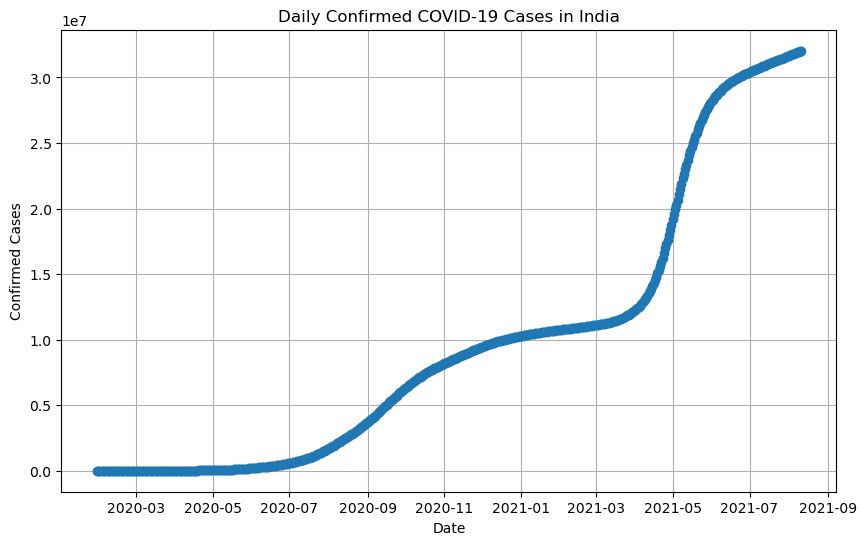

In [3]:
import matplotlib.pyplot as plt

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(df_daily['Date'], df_daily['Confirmed'], marker='o')
plt.title('Daily Confirmed COVID-19 Cases in India')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.grid(True)
plt.show()


In [4]:
from statsmodels.tsa.stattools import adfuller
reult = adfuller(df_daily['Confirmed'])
print('ADF Statistic:', reult[0])
print('p-value:', reult[1])


ADF Statistic: 0.898770876540962
p-value: 0.9930742649536402


In [5]:
df_daily['Differenced'] = df_daily['Confirmed'].diff().dropna()


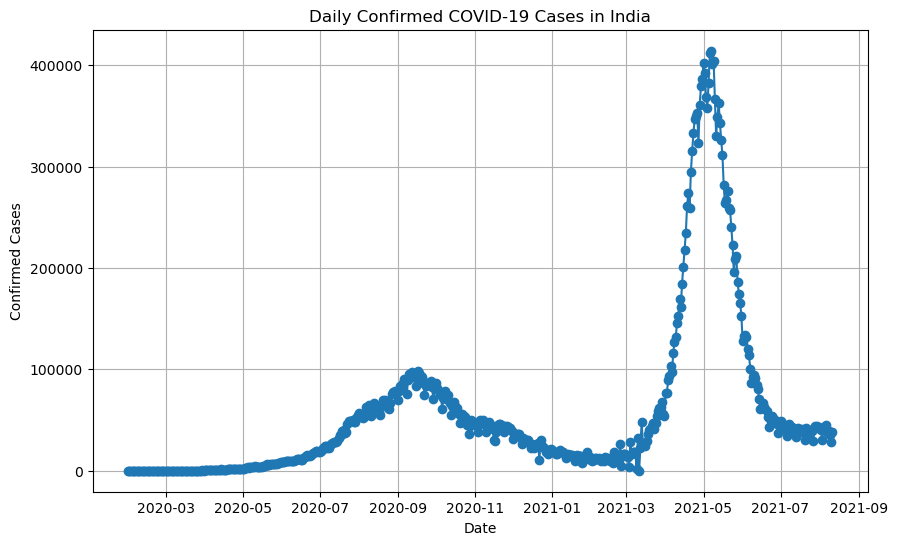

In [6]:
import matplotlib.pyplot as plt

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(df_daily['Date'], df_daily['Differenced'], marker='o')
plt.title('Daily Confirmed COVID-19 Cases in India')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.grid(True)
plt.show()

In [7]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_daily['Confirmed'], order=(1,1,1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Confirmed   No. Observations:                  560
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5810.394
Date:                Wed, 05 Jun 2024   AIC                          11626.789
Time:                        06:22:28   BIC                          11639.767
Sample:                             0   HQIC                         11631.857
                                - 560                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9967      0.002    631.317      0.000       0.994       1.000
ma.L1          0.0621      0.019      3.297      0.001       0.025       0.099
sigma2      6.295e+07   3.55e-11   1.77e+18      0.000    6.29e+07    6.29e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               842.49
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):             132.44   Skew:                             0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.24e+34. Standard errors may be unstable.
"""

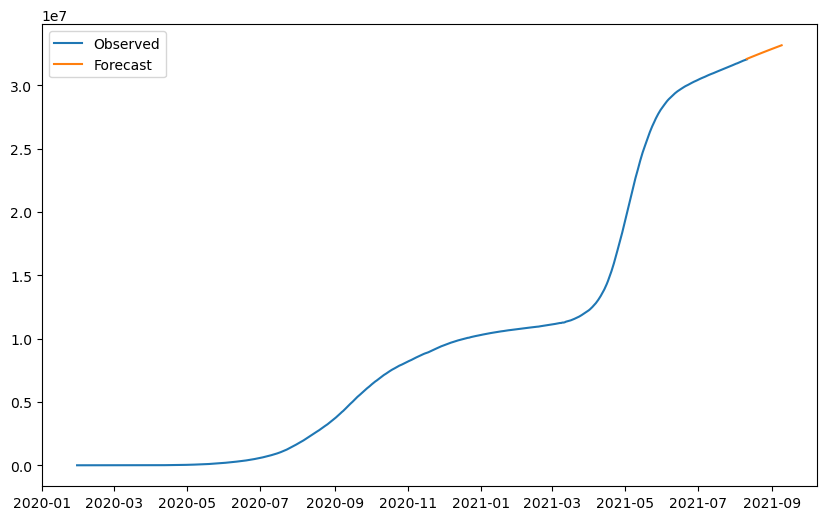

In [8]:
forecast = model_fit.forecast(steps=30)
plt.figure(figsize=(10, 6))
plt.plot(df_daily['Date'], df_daily['Confirmed'], label='Observed')
plt.plot(pd.date_range(start=df_daily['Date'].iloc[-1], periods=30, freq='D'), forecast, label='Forecast')
plt.legend()
plt.show()
